In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
#load the data
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

print("df_train_raw shape =", df_train_raw.shape)
print("df_test_raw shape =", df_test_raw.shape)

df_train_raw shape = (891, 12)
df_test_raw shape = (418, 11)


In [4]:
df_train_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Save the survived column as y for later and drop it from the train data
y_train = df_train_raw.Survived
x_train_raw = df_train_raw.drop(['Survived'], axis = 1)

# Join the X data from the train and test files, for feature processing
X_all = pd.concat((x_train_raw, df_test_raw), axis = 0, ignore_index=True)

print('data shape = ', X_all.shape)
X_all.head()

data shape =  (1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Analysis and preparation of column "Name":

names = X_all.Name

print("There are " + str(pd.isnull(names).sum()) + " nan's in the name column")

# First, separate the surname from the rest of the name
for i in range(len(names)):
    
    full_name = str(names[i])
    
    # First split: separate the surname from the rest of the name
    name_split_1 = full_name.split(sep = ', ', maxsplit=1)
    surname = name_split_1[0]
    title_and_name = name_split_1[1]
    
    # Second split: separate the title from the rest of the name
    name_split_2 = title_and_name.split(sep = '. ', maxsplit=1)
    
    title = name_split_2[0]
    first_name = name_split_2[1]
    
    
    if(i==0):
        titles = np.array(title).reshape(1,1)
        first_names = np.array(first_name).reshape(1,1)
        surnames = np.array(surname).reshape(1,1)
        
    else:
        titles = np.append(titles, np.array(title).reshape(1,1), axis = 0)
        first_names = np.append(first_names, np.array(first_name).reshape(1,1), axis = 0)
        surnames = np.append(surnames, np.array(surname).reshape(1,1), axis = 0)
        
print("There are ", np.unique(titles).shape[0], " unique titles: ")
print(str(np.unique(titles)))

# add the title, first and last name to X_all
X_all['Title'] = titles
X_all['FirstName'] = first_names
X_all['Surname'] = surnames

X_all.head()

There are 0 nan's in the name column
There are  18  unique titles: 
['Capt' 'Col' 'Don' 'Dona' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Master' 'Miss'
 'Mlle' 'Mme' 'Mr' 'Mrs' 'Ms' 'Rev' 'Sir' 'the Countess']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,Surname
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


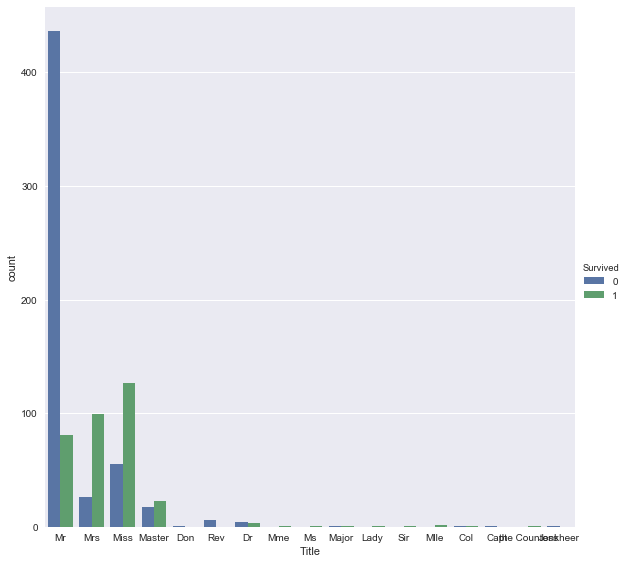

In [7]:
# 18 unique titles could cause trouble for the model. 
# Analysis of the frequency of the titles and respective survival in the training data
title_df = X_all[0:891]
title_df['Survived'] = y_train
title_df.head()

#plt.figure(figsize=(10,5))
sns.factorplot('Title',data=title_df,hue='Survived',kind='count', size = 8)


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


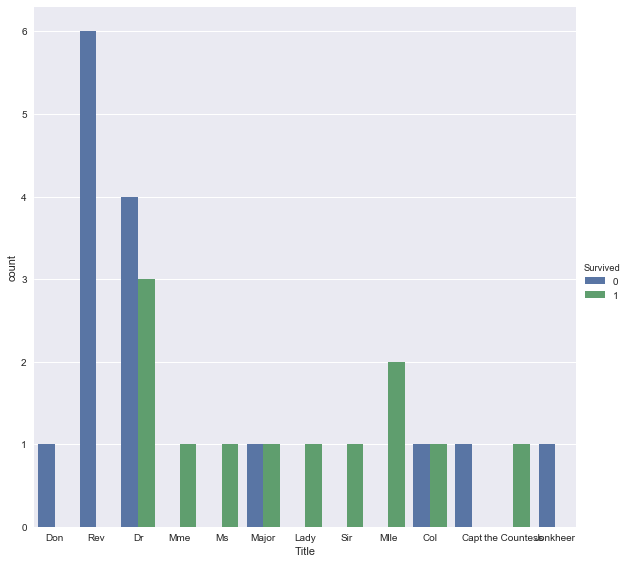

In [8]:
#Remove the most frequent occuring titles to better analyze the rest
title_df_2  = title_df[title_df.Title != 'Mr']
title_df_2 = title_df_2[title_df.Title != 'Mrs']
title_df_2 = title_df_2[title_df.Title != 'Miss']
title_df_2 = title_df_2[title_df.Title != 'Master']

#plt.figure(figsize=(10,5))
sns.factorplot('Title',data=title_df_2,hue='Survived',kind='count', size = 8)

In [9]:
X_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,Surname
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen


In [10]:
X_all.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [11]:
# to make the job easier for the model, some titles will be grouped together, using very rudimentar 
# form of mean encoding:
# Convert Don, Rev, Jonkheer and Capt to 'title_0'
# Convert Mme, Ms, Lady, Sir, Mle to 'title_1'

X_all['Title'] = X_all['Title'].map({'Don': 'title_0',
                                     'Rev': 'title_0', 
                                     'Jonkheer': 'title_0', 
                                     'Capt': 'title_0', 
                                     'Mme': 'title_1', 
                                     'Ms': 'title_1', 
                                     'Lady': 'title_1', 
                                     'Sir': 'title_1', 
                                     'Mlle': 'title_1', 
                                     'Mr': 'Mr',
                                     'Mrs': 'Mrs',
                                     'Miss': 'Miss',
                                     'Master': 'Master',
                                     'Dr': 'Dr',
                                     'Major': 'Major',
                                     'Col': 'Col',
                                     'the Countess': 'the Countess',
                                     'Dona': 'Dona',
                                    })

In [12]:
X_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,Surname
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen


In [13]:
# Preprocessing of the ticket column
# the ticket will be separated in prefix and suffix

tickets = X_all.Ticket

print("There are " + str(pd.isnull(tickets).sum()) + " nan's in the ticket column")

for i in range(len(tickets)):
    
    # get entry i of column 'ticket'
    full_ticket = str(tickets[i])
    
    # Separate the prefix from the ticket number
    ticket_split_1 = full_ticket.split(sep = ' ', maxsplit=1)
    
    # if there's no prefix, use -999
    if(len(ticket_split_1) == 1):
        # if there's no prefix, fill with 'nan' so it matches with the dtype of the elemenst in the column (str)
        prefix = 'nan'
        number = ticket_split_1[0]
    else:
        prefix = ticket_split_1[0]
        number = ticket_split_1[1]
    
    # append both strings to the respective arrays
    if(i==0):
        ticket_prefix = np.array(prefix).reshape(1,1)
        ticket_number = np.array(number).reshape(1,1)
    else:
        ticket_prefix = np.append(ticket_prefix, np.array(prefix).reshape(1,1), axis = 0)
        ticket_number = np.append(ticket_number, np.array(number).reshape(1,1), axis = 0)

# add the ticket prefix and number to X_all
X_all['TicketPrefix'] = ticket_prefix
X_all['TicketNumber'] = ticket_number

X_all.head()

There are 0 nan's in the ticket column


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,Surname,TicketPrefix,TicketNumber
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund,A/5,21171
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings,PC,17599
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen,STON/O2.,3101282
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle,nan,113803
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen,nan,373450


In [14]:
#Analisys of the 'cabin' column

cabins = X_all.Cabin

for i in range(len(cabins)):
    
    # get entryi of column 'cabin'
    full_cabin = str(cabins[i])
    
    #print(full_cabin)
    
    # First, check if the entry i is NaN
    if(full_cabin == 'nan'):
    # no cabin
        reserve = 0
        multiple = 0
        letter = 'Z'
    else:
        # passenger has a cabin
        reserve = 1
        
        # check if there is more than one cabin reserved
        cabin_split_1 = full_cabin.split(sep = ' ', maxsplit=1)
        
        if(len(cabin_split_1) > 1):
            multiple = 1
        else:
            multiple = 0
        
        # check the letter, corresponding to the level in the ship
        
        #cabin_split_2 = full_cabin.split(sep = '', maxsplit=1)
        letter = full_cabin[0]
        
    #print(full_cabin, ' || reserve = ', reserve, 'multiple = ', multiple, 'letter = ', letter)
    #print(cabin_split_1)
    #print('======')
    
    # append both strings to the respective arrays
    if(i==0):
        cabin_reserve = np.array(reserve).reshape(1,1)
        cabin_multiple = np.array(multiple).reshape(1,1)
        cabin_letter = np.array(letter).reshape(1,1)
    else:
        cabin_reserve = np.append(cabin_reserve, np.array(reserve).reshape(1,1), axis = 0)
        cabin_multiple = np.append(cabin_multiple, np.array(multiple).reshape(1,1), axis = 0)
        cabin_letter = np.append(cabin_letter, np.array(letter).reshape(1,1), axis = 0)

# add the ticket prefix and number to X_all
X_all['CabinReserve'] = cabin_reserve
X_all['CabinMultiple'] = cabin_multiple
X_all['CabinLetter'] = cabin_letter
X_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,Surname,TicketPrefix,TicketNumber,CabinReserve,CabinMultiple,CabinLetter
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund,A/5,21171,0,0,Z
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings,PC,17599,1,0,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen,STON/O2.,3101282,0,0,Z
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle,nan,113803,1,0,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen,nan,373450,0,0,Z


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


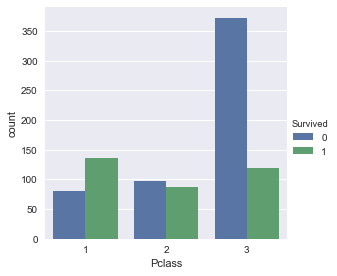

In [15]:
sns.factorplot('Pclass',data=df_train_raw,hue='Survived',kind='count')

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


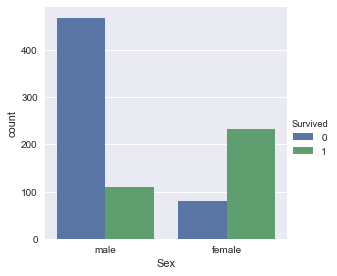

In [16]:
sns.factorplot('Sex',data=df_train_raw,hue='Survived',kind='count')

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


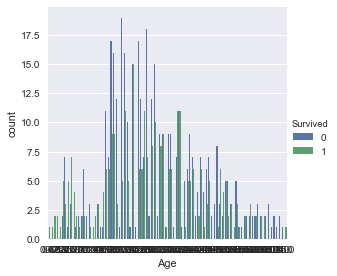

In [17]:
sns.factorplot('Age',data=df_train_raw,hue='Survived',kind='count')

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


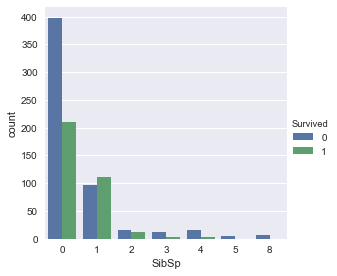

In [17]:
sns.factorplot('SibSp',data=df_train_raw,hue='Survived',kind='count')

/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:1464: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


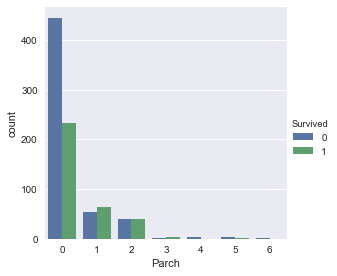

In [18]:
sns.factorplot('Parch',data=df_train_raw,hue='Survived',kind='count')

In [19]:
X_all.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FirstName,Surname,TicketPrefix,TicketNumber,CabinReserve,CabinMultiple,CabinLetter
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund,A/5,21171,0,0,Z
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings,PC,17599,1,0,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen,STON/O2.,3101282,0,0,Z
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle,nan,113803,1,0,C
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen,nan,373450,0,0,Z


In [20]:
# Convert categorical features into ordinal numbers.
from sklearn.preprocessing import LabelEncoder

def convert_to_int(column):
    # convert -column- to integer
    
    # replace nan's with -999
    column[pd.isnull(column)]  = 'NaN'
    
    # encode the column to integers
    le = LabelEncoder()
    le.fit(column.unique())
    column_int = le.transform(column)
    return column_int

# Go trough all columns of datatype object (except Neighborhood, that will be processed later)

# Name, Ticket might not be very useful, consider removing later
X_all.Sex = convert_to_int(X_all.Sex)
X_all.Embarked = convert_to_int(X_all.Embarked)
X_all.Title = convert_to_int(X_all.Title)
X_all.Surname = convert_to_int(X_all.Surname)
X_all.TicketPrefix = convert_to_int(X_all.TicketPrefix)
X_all.CabinLetter = convert_to_int(X_all.CabinLetter)
#X_all.Name = convert_to_int(X_all.Name)
#X_all.Name = convert_to_int(X_all.Name)

# Drop Name, Ticket, Cabin, FirstName, TicketNumber
X_all = X_all.drop(['Name'], axis = 1)
X_all = X_all.drop(['Ticket'], axis = 1)
X_all = X_all.drop(['Cabin'], axis = 1)
X_all = X_all.drop(['FirstName'], axis = 1)
X_all = X_all.drop(['TicketNumber'], axis = 1)

#X_all = X_all.drop(['PassengerId'], axis = 1)


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
X_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Surname,TicketPrefix,CabinReserve,CabinMultiple,CabinLetter
0,1,3,1,22.0,1,0,7.2500,3,6,100,5,0,0,8
1,2,1,0,38.0,1,0,71.2833,0,7,182,21,1,0,2
2,3,3,0,26.0,0,0,7.9250,3,5,329,42,0,0,8
3,4,1,0,35.0,1,0,53.1000,3,7,267,49,1,0,2
4,5,3,1,35.0,0,0,8.0500,3,6,15,49,0,0,8


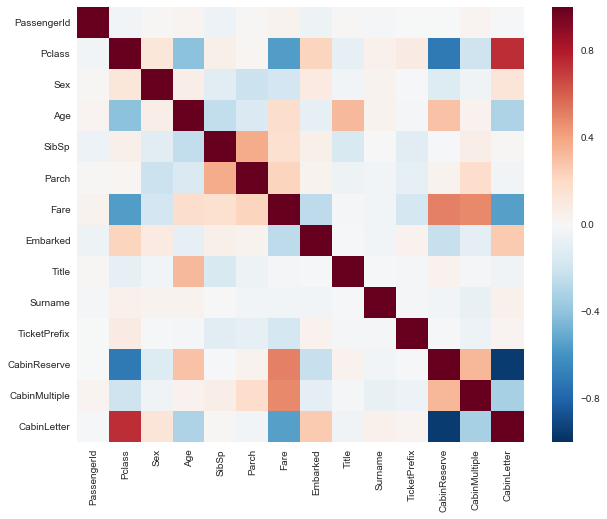

In [22]:
# plot the correlation between features and target

plt.rcParams['figure.figsize'] = (10, 8)

import seaborn as sns
corr = X_all.corr()

corr_map = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr_map.yaxis.set_label_position('right')
plt.title = ('titulo')

In [23]:
X_all.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Surname,TicketPrefix,CabinReserve,CabinMultiple,CabinLetter
0,1,3,1,22.0,1,0,7.2500,3,6,100,5,0,0,8
1,2,1,0,38.0,1,0,71.2833,0,7,182,21,1,0,2
2,3,3,0,26.0,0,0,7.9250,3,5,329,42,0,0,8
3,4,1,0,35.0,1,0,53.1000,3,7,267,49,1,0,2
4,5,3,1,35.0,0,0,8.0500,3,6,15,49,0,0,8


In [24]:
X_train = X_all[0:891]
X_test = X_all[891:]

In [25]:
y_train.shape

(891,)

In [26]:
import xgboost as xgb

regr = xgb.XGBClassifier(eval_metric= 'logloss', 
                         objective= "binary:logistic",
                         #tuning parameters
                         max_depth= 14,            #Vary btwn 3-15
                         n_estimators = 100000,
                         eta= 0.1,                #Vary btwn 0.1-0.3
                         nthread = 4,             #Increase this to improve speed
                         subsample= 1,            #Vary btwn 0.8-1
                         colsample_bytree= 0.5,   #Vary btwn 0.3-0.8
                         reg_lambda= 0.5,             #Vary between 0-3
                         alpha= 0.5,              #Vary between 0-3
                         min_child_weight= 3,     #Vary btwn 1-10
                         num_boost_round= 5000               #Vary btwn 100-3000 based on max.depth, eta, 
                 #colsample_bytree=0.2,
                 #gamma=0.0,
                 #learning_rate=0.05,
                 #max_depth=6,
                 #min_child_weight=1.5,
                 #n_estimators=10000,                                                                  
                 #reg_alpha=0.9,
                 #reg_lambda=0.6,
                 #subsample=0.2,
                 #seed=42,
                 #silent=1)
                        )

regr.fit(X_train, y_train)

# make predictions for test data
y_pred = regr.predict(X_test)

# evaluate predictions
#from sklearn.metrics import mean_squared_error
#MSE_score = mean_squared_error(y_test, y_pred)
#print("MSE score: " , MSE_score)

#import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
#def rmsle(y, y_pred):
#    assert len(y) == len(y_pred)
#    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
#    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5
#
#RMSLE_score = rmsle(y_test, y_pred)
#print("RMSLE score: " , RMSLE_score)

y_pred_subm = regr.predict(X_test)

submission_PassengerId = pd.DataFrame(df_test_raw.PassengerId)
submission_Survived = pd.DataFrame(y_pred_subm)

submission = pd.concat((submission_PassengerId, submission_Survived), axis = 1)
submission.columns = ['PassengerId', 'Survived']
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [27]:
submission.to_csv('submission.csv', index = False)